<h1>Keras Syntax Basics</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('DATA/fake_reg.csv')

In [5]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

C:\Users\axel.coronado\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\axel.coronado\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\axel.coronado\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


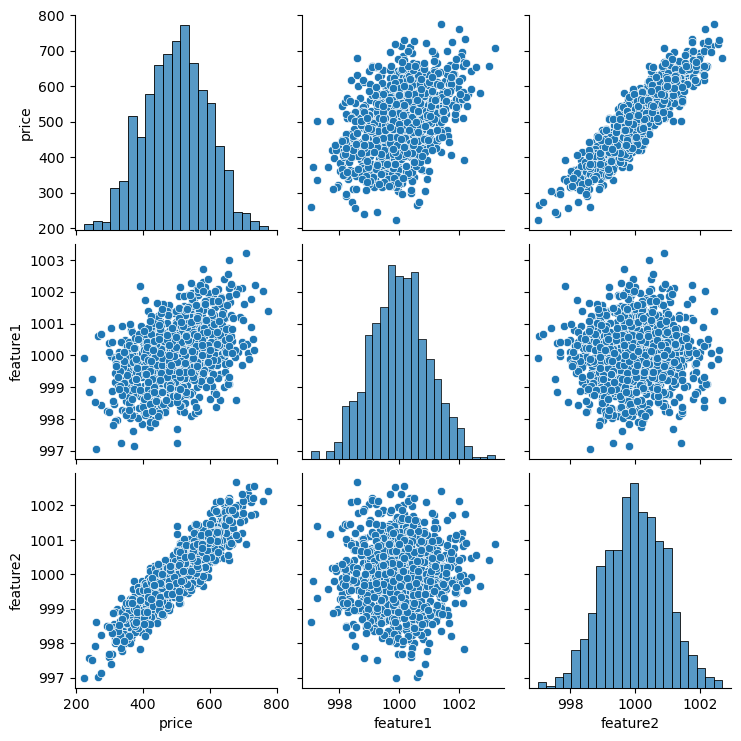

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [10]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [21]:
X_train.max()

1.0

In [22]:
X_train.min()

0.0

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

In [25]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

In [30]:
#model = Sequential([
#    Dense(4, activation='relu'),
#    Dense(4, activation='relu'),
#    Dense(4, activation='relu'),
#    Dense(1)
#])

# This do the same, this es more recomendable
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [31]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259249.6250
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 261289.6094  
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250890.1719
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253385.6094
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256117.7500  
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259634.2031 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252000.5156 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251504.7500 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255182.7344
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257635.5000  
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257016.3281 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250468.0781  
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253346.7188  
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [33]:
model.history.history

{'loss': [256551.8125,
  256412.34375,
  256256.78125,
  256066.65625,
  255835.3125,
  255559.203125,
  255233.390625,
  254859.3125,
  254434.90625,
  253955.515625,
  253419.3125,
  252819.015625,
  252154.953125,
  251422.453125,
  250613.71875,
  249726.578125,
  248757.875,
  247698.109375,
  246542.28125,
  245302.3125,
  243955.171875,
  242506.609375,
  240944.296875,
  239269.96875,
  237469.125,
  235547.125,
  233496.609375,
  231301.9375,
  228985.34375,
  226524.828125,
  223927.0,
  221168.140625,
  218254.625,
  215190.859375,
  211969.828125,
  208577.21875,
  205047.0,
  201351.203125,
  197491.6875,
  193433.21875,
  189219.046875,
  184834.65625,
  180294.75,
  175591.59375,
  170721.71875,
  165701.84375,
  160509.234375,
  155172.734375,
  149693.796875,
  144073.3125,
  138298.953125,
  132435.765625,
  126441.5546875,
  120320.4921875,
  114173.0859375,
  107946.9375,
  101607.8984375,
  95246.7734375,
  88863.125,
  82465.625,
  76090.1015625,
  69790.5234375,


In [36]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

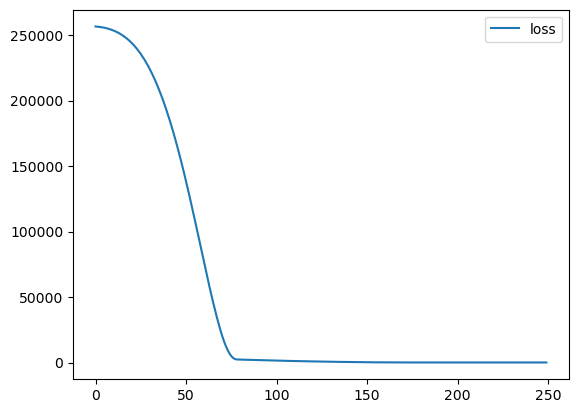

In [38]:
loss_df.plot()

In [39]:
model.evaluate(X_test, y_test, verbose=0)

25.05593490600586

In [40]:
model.evaluate(X_train, y_train, verbose=0)

23.76502227783203

In [41]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [42]:
test_predictions

array([[405.2817 ],
       [623.78986],
       [592.372  ],
       [572.451  ],
       [366.57162],
       [579.4079 ],
       [515.20734],
       [459.16626],
       [549.4388 ],
       [447.56168],
       [612.0373 ],
       [549.11633],
       [419.11172],
       [408.8702 ],
       [651.5274 ],
       [437.33023],
       [508.5709 ],
       [660.1519 ],
       [662.8205 ],
       [565.73944],
       [334.1318 ],
       [444.88022],
       [382.49368],
       [378.71072],
       [566.8057 ],
       [610.825  ],
       [532.5565 ],
       [427.88144],
       [655.6738 ],
       [414.0796 ],
       [442.67288],
       [485.22772],
       [438.4501 ],
       [682.0821 ],
       [424.7664 ],
       [417.70157],
       [502.03375],
       [550.6622 ],
       [509.8782 ],
       [395.35043],
       [618.84955],
       [416.63153],
       [604.7067 ],
       [445.99637],
       [502.112  ],
       [581.9295 ],
       [669.2783 ],
       [490.504  ],
       [318.44757],
       [485.52902],


In [43]:
test_predictions = pd.Series(test_predictions.reshape(300, ))

In [44]:
test_predictions

0      405.281708
1      623.789856
2      592.372009
3      572.450989
4      366.571625
          ...    
295    529.210510
296    515.496521
297    609.906189
298    416.955597
299    410.881104
Length: 300, dtype: float32

In [45]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [46]:
pred_df

Test True Y
0     402.296319
1     624.156198
2     582.455066
3     578.588606
4     371.224104
..           ...
295   525.704657
296   502.909473
297   612.727910
298   417.569725
299   410.538250

[300 rows x 1 columns]

In [47]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [48]:
pred_df

Test True Y           0
0     402.296319  405.281708
1     624.156198  623.789856
2     582.455066  592.372009
3     578.588606  572.450989
4     371.224104  366.571625
..           ...         ...
295   525.704657  529.210510
296   502.909473  515.496521
297   612.727910  609.906189
298   417.569725  416.955597
299   410.538250  410.881104

[300 rows x 2 columns]

In [49]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [50]:
pred_df

Test True Y  Model Predictions
0     402.296319         405.281708
1     624.156198         623.789856
2     582.455066         592.372009
3     578.588606         572.450989
4     371.224104         366.571625
..           ...                ...
295   525.704657         529.210510
296   502.909473         515.496521
297   612.727910         609.906189
298   417.569725         416.955597
299   410.538250         410.881104

[300 rows x 2 columns]

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

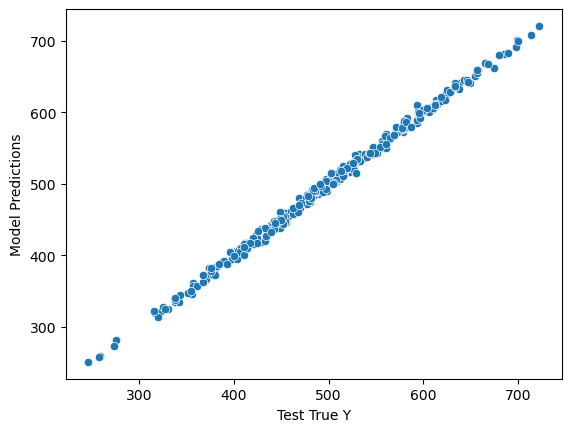

In [51]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.007124377906228

In [54]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [55]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.05593684164503

In [56]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.0055905587298115

In [57]:
new_gem = [[998, 1000]]

In [58]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [59]:
new_gem = scaler.transform(new_gem)

In [60]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[419.71213]], dtype=float32)

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save('my_gem_model.h5')

In [63]:
later_model = load_model('my_gem_model.h5')

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [64]:
later_model.predict(new_gem)

NameError: name 'later_model' is not defined